O jamaicano Usain Bolt é considerado por muitos o melhor velocista de todos os tempos. Mesmo tendo se aposentado das pistas em 2017, seu nome é ainda um dos primeiros a vir à mente do grande público quando o assunto é atletismo.

Nesse artigo, veremos como podemos utilizar a linguagem Python para saber a velocidade e aceleração atingidas pelo jamaicano nas provas de 100 m da Olimpíada de Pequim de 2008, onde marcou o recorde mundial da prova, e no Mundial de Atletismo de 2009 em Berlin, onde quebrou seu próprio recorde. Aproveitaremos para discutir um pouco sobre modelos matemáticos e cuidados na seleção e interpretação de seus resultados.

O código do artigo se encontra no formato Jupyter Notebook no [repositório do Ciência Programada no GitHub](https://github.com/Ciencia-Programada/bolt-vs-python). Dê uma olhada e pratique baixando o arquivo e alterando o código.

# Obtendo os dados

O primeiro passo é, obviamente, obter os dados e passá-los para uma forma que pode ser tratada pelos pacotes que utilizaremos. O tempo total de cada prova é relativamente fácil de achar na internet mas, para que possamos ter uma noção melhor do desempenho do atleta na prova, quanto mais detalhes obtivermos, melhor.

O site [Speed Endurance](https://speedendurance.com/2009/08/19/usain-bolt-10-meter-splits-fastest-top-speed-2008-vs-2009/) compilou os dados dos [relatórios](https://www.worldathletics.org/about-iaaf/documents/research-centre) da Associação Internacional de Federeções de Atletismo - IAAF (*International Association of Athletics Federations*) dos dois eventos. Segue uma tabela adaptada com os dados compilados:

![tabela_tempos](tabela_tempos.png)

Na tabela, TR significa "tempo de reação", ou seja, o tempo que passou do disparo de início da prova até o atleta efetivamente se mover. Não estava ventando na prova de 2008 e havia um vento favorável 0,9 m/s na prova de 2009 de acordo com os dados dos relatórios.

O interessante é que temos os tempos de Bolt a cada 10 m, o que nos será útil mais adiante. Podemos pegar os tempos acumulados, colocar em uma planilha e exportar para o formato csv ([*comma separeted values*](https://en.wikipedia.org/wiki/Comma-separated_values), valores separados por vírgula), formato usualmente reconhecido por qualquer pacote matemático.

Vamos dar uma olhada em nosso arquivo:

In [1]:
!cat bolt.csv

Splits,"2008 Beijing","2009 Berlin"
0,0,0
"0 - 10",1.85,1.89
"10 - 20",2.87,2.88
"20 - 30",3.78,3.78
"30 - 40",4.65,4.64
"40 - 50",5.50,5.47
"50 - 60",6.32,6.29
"60 - 70",7.14,7.10
"70 - 80",7.96,7.92
"80 - 90",8.79,8.75
"90 - 100",9.69,9.58


Split é o termo que se usa para cada divisão da prova, cada marcação de 10 metros. É tão comum que preferi manter o termo em inglês. Repare que coloquei uma linha com tempo 0 no início para facilitar a construção de gráficos futuramente. Como tudo em programação, o idioma padrão é inglês, então o formato dos números está no formato inglês, pontos para separar a parte decimal ao invés de vírgulas como estamos acostumados a usar. Recomendo fortemente que mude nas opções de seus programas para deixar ponto como padrão, nem todo pacote terá a opção de receber arquivos com vírgula. Na realidade, para se acostumar com o idioma, recomendo usar todos seus programadas e o sistema operacional em inglês, mas é apenas minha opinião.

Vamos armazenar o caminho do arquivo em uma variável para ficar mais fácil de se referir durante o programa:

In [2]:
arquivo_dados = 'bolt.csv'

Um dos pacotes mais utilizados para lidar com dados numéricos e computação científica em Python é o [NumPy](https://numpy.org/). Vamos importá-lo juntamente com o [Matplotlib](https://matplotlib.org/), para gráficos:

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Para importar dados do arquivo csv, usaremos o método [genfromtxt](https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html). Para entender o funcionamento deste método, vamos olhar o output passando apenas o arquivo e o delimitador (vírgula no caso de arquivos csv):

In [4]:
np.genfromtxt(arquivo_dados, delimiter=',')

array([[ nan,  nan,  nan],
       [0.  , 0.  , 0.  ],
       [ nan, 1.85, 1.89],
       [ nan, 2.87, 2.88],
       [ nan, 3.78, 3.78],
       [ nan, 4.65, 4.64],
       [ nan, 5.5 , 5.47],
       [ nan, 6.32, 6.29],
       [ nan, 7.14, 7.1 ],
       [ nan, 7.96, 7.92],
       [ nan, 8.79, 8.75],
       [ nan, 9.69, 9.58]])

Repare que há `nan` em várias posições. Mais especificamente, nas posições onde havia texto. Isso porque o método, por padrão, espera tipo `float` em todas as posições. Quando encontra algo inesperado, de outro tipo, substitui por `nan` ([*not a number*](https://en.wikipedia.org/wiki/NaN)). Assim, precisamos informar que a primeira coluna é de texto (tipo `string`) e, além disso, que a primeira linha contém os nomes de cada coluna. Para isso, usamos os seguintes parâmetros do método:

In [5]:
np.genfromtxt(arquivo_dados, delimiter=',', dtype=(str, float, float), names=True)

array([('', 0.  , 0.  ), ('', 1.85, 1.89), ('', 2.87, 2.88),
       ('', 3.78, 3.78), ('', 4.65, 4.64), ('', 5.5 , 5.47),
       ('', 6.32, 6.29), ('', 7.14, 7.1 ), ('', 7.96, 7.92),
       ('', 8.79, 8.75), ('', 9.69, 9.58)],
      dtype=[('Splits', '<U'), ('2008_Beijing', '<f8'), ('2009_Berlin', '<f8')])

Repare que a parte dos nomes funcionou, agora o output lista os nomes ao final. No entanto, os textos aparecem como strings vazias. [De acordo com a documentação](https://numpy.org/doc/stable/reference/arrays.dtypes.html#specifying-and-constructing-data-types) é necessário passar o tipo de codificação e a quantidade de caracteres esperada. No nosso caso, [unicode](https://en.wikipedia.org/wiki/Unicode) e 10 caracteres:

In [6]:
np.genfromtxt(arquivo_dados, delimiter=',', dtype=('U10', float, float), names=True)

array([('0', 0.  , 0.  ), ('"0 - 10"', 1.85, 1.89),
       ('"10 - 20"', 2.87, 2.88), ('"20 - 30"', 3.78, 3.78),
       ('"30 - 40"', 4.65, 4.64), ('"40 - 50"', 5.5 , 5.47),
       ('"50 - 60"', 6.32, 6.29), ('"60 - 70"', 7.14, 7.1 ),
       ('"70 - 80"', 7.96, 7.92), ('"80 - 90"', 8.79, 8.75),
       ('"90 - 100"', 9.69, 9.58)],
      dtype=[('Splits', '<U10'), ('2008_Beijing', '<f8'), ('2009_Berlin', '<f8')])

Agora sim, mas repare que não armazenamos os dados em nenhuma variável. Podemos utilizar um pequeno macete do Notebook. Quando "esquecemos" de armazenar o resultado da última célula executada em uma variável, podemos criar a variável e atribuir a ela `_`:

In [7]:
dados = _

Vamos verificar:

In [8]:
dados

array([('0', 0.  , 0.  ), ('"0 - 10"', 1.85, 1.89),
       ('"10 - 20"', 2.87, 2.88), ('"20 - 30"', 3.78, 3.78),
       ('"30 - 40"', 4.65, 4.64), ('"40 - 50"', 5.5 , 5.47),
       ('"50 - 60"', 6.32, 6.29), ('"60 - 70"', 7.14, 7.1 ),
       ('"70 - 80"', 7.96, 7.92), ('"80 - 90"', 8.79, 8.75),
       ('"90 - 100"', 9.69, 9.58)],
      dtype=[('Splits', '<U10'), ('2008_Beijing', '<f8'), ('2009_Berlin', '<f8')])

Podemos acessar cada coluna dos dados pelos seus nomes:

In [9]:
dados['Splits']

array(['0', '"0 - 10"', '"10 - 20"', '"20 - 30"', '"30 - 40"',
       '"40 - 50"', '"50 - 60"', '"60 - 70"', '"70 - 80"', '"80 - 90"',
       '"90 - 100"'], dtype='<U10')

In [10]:
dados['2008_Beijing']

array([0.  , 1.85, 2.87, 3.78, 4.65, 5.5 , 6.32, 7.14, 7.96, 8.79, 9.69])

In [11]:
dados['2009_Berlin']

array([0.  , 1.89, 2.88, 3.78, 4.64, 5.47, 6.29, 7.1 , 7.92, 8.75, 9.58])

Agora já temos o que precisamos para começar a explorar esses dados. Vamos começar com alguns gráficos simples.

# Primeiros gráficos

Vamos começar fazendo um simples gráfico de posição *versus* tempo. Para os dados do Mundial de Berlin, temos:

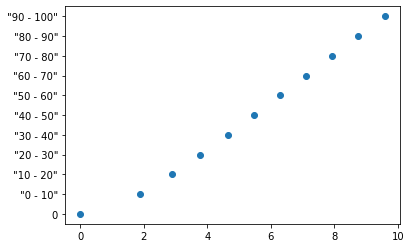

In [12]:
plt.scatter(dados['2009_Berlin'], dados['Splits'])

Por mais que na tabela a informação na forma de intervalo fique de mais fácil interpretação para o leitor, na minha opinião no gráfico o melhor seria o valor inteiro do final do intervalo. Ou seja, 0, 10, 20... Assim, vamos criar uma variável `marcas` que irá armazenar essas marcações a cada 10 metros para podemos utilizar como eixo vertical do gráfico. Para isso, usaremos o método [arange](https://numpy.org/doc/stable/reference/generated/numpy.arange.html) que, de acordo com a documentação, gera valores igualmente espaçados na forma `[início, fim)`. Repare, intervalo fechado no início e aberto no fim. Por isso, no código abaixo está 101, para que o valor 100 esteja incluso: 

In [13]:
marcas = np.arange(0, 101, 10)
marcas

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

Fazendo o gráfico novamente:

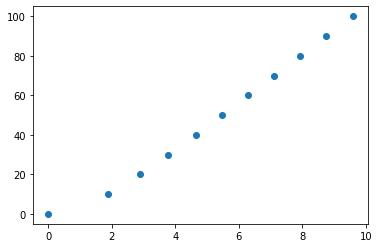

In [14]:
plt.scatter(dados['2009_Berlin'], marcas)
plt.show()

Fica bem mais fácil de entender, na minha opinião. Mas apenas números não significam coisa alguma. Seria melhor colocar título no gráfico e informar do que se trata cada eixo. Além disso, linhas de grade (*grid*) facilitariam a interpretação do gráfico por parte do leitor. Vamos resolver cada caso.

O Matplotlib possui alguns estilos de gráfico pré-definidos que podem ser [vistos aqui](https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html). Vamos escolher um que apresente linhas de grade:

In [15]:
plt.style.use('ggplot')

Esse estilo irá valer para todo o Notebook a partir do momento da execução da célula.

Agora, um pouco de Matplotlib básico para identificar o gráfico e os eixos:

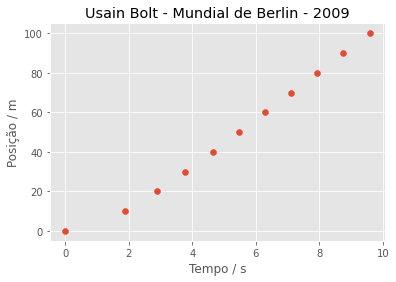

In [16]:
plt.scatter(dados['2009_Berlin'], marcas)
plt.xlabel('Tempo / s')
plt.ylabel('Posição / m')
plt.title('Usain Bolt - Mundial de Berlin - 2009')
plt.show()

Podemos comparar os dados das duas competições no mesmo gráfico:

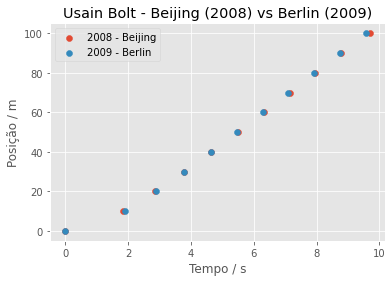

In [17]:
plt.scatter(dados['2008_Beijing'], marcas, label='2008 - Beijing')
plt.scatter(dados['2009_Berlin'], marcas, label='2009 - Berlin')
plt.legend()
plt.xlabel('Tempo / s')
plt.ylabel('Posição / m')
plt.title('Usain Bolt - Beijing (2008) vs Berlin (2009)')
plt.show()

Repare que no gráfico fica mais fácil de perceber que Bolt começou pior na competição de 2009 (trecho entre 0 e 3 segundos), mas recuperou na metade final para quebrar seu próprio recorde.

Podemos também apresentar os gráficos lado a lado. Caso tenha dificuldade de entender o código a seguir, [leia esse artigo](https://cienciaprogramada.com.br/2020/09/graficos-python-pint-matplotlib/) onde também apresento um pouco de Matplotlib e explico um pouco como trabalhar com eixos.

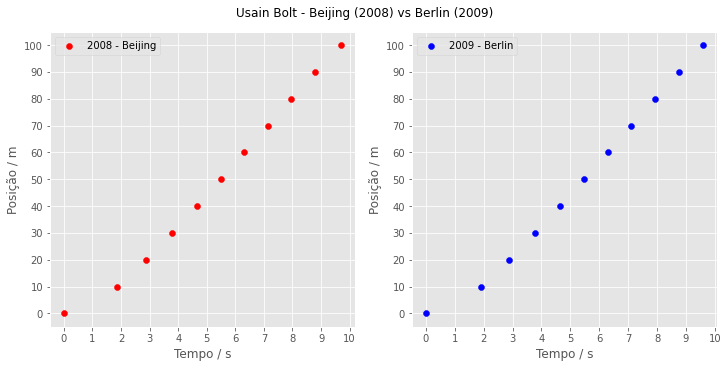

In [18]:
# útil para mudar a frequência dos ticks (marcações, traços) nos eixos
import matplotlib.ticker as plticker

# criando o grid
fig1, axarr = plt.subplots(nrows=1, ncols=2, figsize=(10,5), constrained_layout=True, facecolor=(1,1,1))

# associando eixos a cada posição do grid
ax1 = axarr[0]
ax2 = axarr[1]

# marcações no eixo de posição de 10 em 10 e no de tempo de 1 em 1
ticks_posicao = plticker.MultipleLocator(base=10)
ticks_tempo = plticker.MultipleLocator(base=1)

# os gráficos em si
ax1.scatter(dados['2008_Beijing'], marcas, label='2008 - Beijing', color='red')
ax2.scatter(dados['2009_Berlin'], marcas, label='2009 - Berlin', color='blue')

# nomeando os eixos e colocando as marcações no intervalo desejado
for ax in axarr:
    ax.set_xlabel('Tempo / s')
    ax.xaxis.set_major_locator(ticks_tempo)
    ax.set_ylabel('Posição / m')
    ax.yaxis.set_major_locator(ticks_posicao)
    ax.legend()

# título principal
fig1.suptitle('Usain Bolt - Beijing (2008) vs Berlin (2009)')
plt.show()

Como eixo de posição é igual nos dois gráficos, poderiam ser unificados:

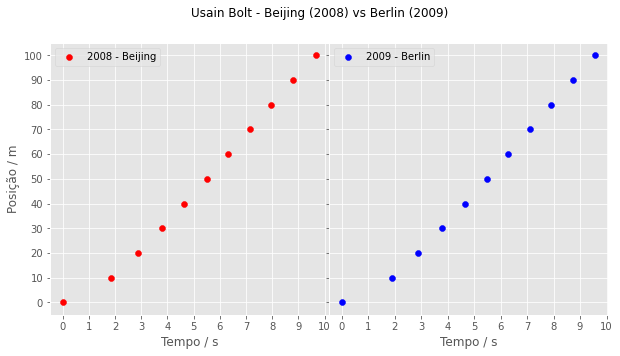

In [19]:
fig2, axarr = plt.subplots(nrows=1, ncols=2, figsize=(10,5), sharey=True, facecolor=(1,1,1))

# removendo espaço horizontal entre os plots
fig2.subplots_adjust(wspace=0)

ax1 = axarr[0]
ax2 = axarr[1]

ticks_posicao = plticker.MultipleLocator(base=10)
ticks_tempo = plticker.MultipleLocator(base=1)

ax1.scatter(dados['2008_Beijing'], marcas, label='2008 - Beijing', color='red')
ax2.scatter(dados['2009_Berlin'], marcas, label='2009 - Berlin', color='blue')

ax1.set_ylabel('Posição / m')
ax1.yaxis.set_major_locator(ticks_posicao)

for ax in axarr:
    ax.set_xlabel('Tempo / s')    
    ax.xaxis.set_major_locator(ticks_tempo)    
    ax.legend()

fig2.suptitle('Usain Bolt - Beijing (2008) vs Berlin (2009)')
plt.show()

Não gosto muito dessa forma, mas deixo aí para conhecimento. Se for colocar gráfico em páginas web, lembre-se que muitos veem pelo celular, então é melhor deixar os eixos separados para facilitar aqueles que usam zoom para conseguir enxergar os gráficos separadamente. Unificar eixos costuma ser uma opção melhor em trabalhos feitos para ler em computador ou em papel.

# Como "ligar os pontos"?

Repare que, por enquanto, apenas plotamos os pontos referentes a cada posição de Bolt no tempo em cada prova. Mas, como ligar esses pontos? Ou, aqueles mais conhecedores de Matplotlib devem estar se perguntando por que não usei o método `plot`:

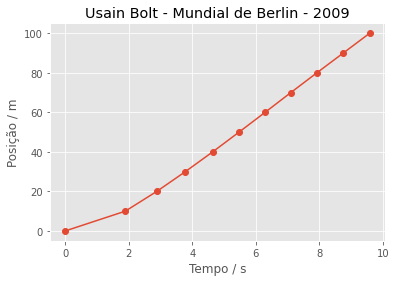

In [20]:
# ERRADO!!
plt.xlabel('Tempo / s')
plt.ylabel('Posição / m')
plt.title('Usain Bolt - Mundial de Berlin - 2009')

plt.plot(dados['2009_Berlin'], marcas, marker='o')
plt.show()

Ora, é simples saber o problema com o gráfico acima. Reparou no que o método fez? Ele simplesmente ligou os pontos, bem parecido com o que você fazia bem criancinha naqueles livros de desenho com pontos para ligar e formar desenhos. Mas, depois, quando ficou uma criancinha um pouco mais esperta, você começou a perceber que, para o desenho ficar esteticamente mais aceitável, nem sempre era para ligar com retas, né?

Então, aqui não é um desenho de ligar pontos mas a ideia é mesma. Será que é para ligar com retas? E aqui o parâmetro obviamente não é estético e, sim, uma análise lógica e física da situação.

Logicamente que Bolt não correu com velocidade constante durante toda a prova. Especialmente na arrancada inicial, onde ele saiu do repouso (velocidade zero), certamente acelerou utilizando toda a explosão muscular possível até atingir um máximo de velocidade e tentou manter esse máximo até o final da prova, mas pode não ter conseguido. Aliás vamos ver as provas.

No vídeo da prova de 2008, fica perceptível que ele já comemorava nos metros finais:

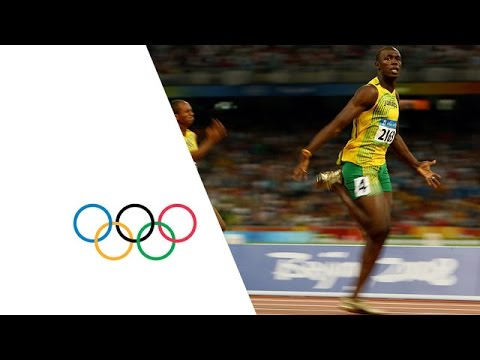

In [21]:
from IPython.display import YouTubeVideo

YouTubeVideo('93dC0o2aHto', width=600, height=300)

Em 2009 não comemorou com antecedência, apenas olhou para o cronômetro nas passadas finais:

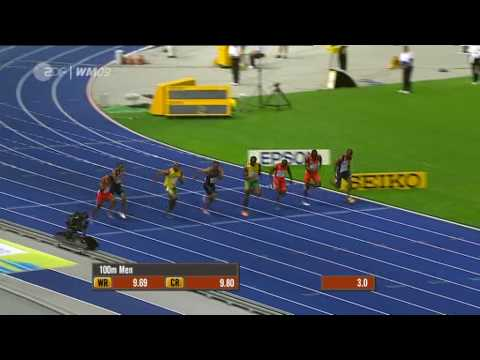

In [22]:
YouTubeVideo('3nbjhpcZ9_g', width=600, height=300)

É de se esperar que a comemoração em 2008 tenha diminuído um pouco a velocidade.

E o que velocidade tem a ver com nosso gráfico de posição? Ora, velocidade é a variação da posição no tempo. Logo, mais pontos de posição seriam úteis para um melhor estudo da velocidade. Aqui entra o conceito de interpolação.

## Interpolação

Precisamos estimar pontos intermediários aos pontos experimentais que temos. O nome formal disso é interpolação. Não confunda com regressão. Em uma regressão, tentamos verificar qual função matemática melhor descreve um determinado conjunto de dados, não necessariamente passando por pontos desses dados. Na interpolação você passa pelos pontos.

Para os fins desse artigo, essa definição de interpolação basta. Caso queira mais rigor, veja [esse artigo sobre interpolação](https://en.wikipedia.org/wiki/Interpolation), [esse sobre regressão](https://en.wikipedia.org/wiki/Regression_analysis) e [essa discussão](https://stats.stackexchange.com/questions/33659/how-is-interpolation-related-to-the-concept-of-regression/) sobre a diferença entre os dois conceitos.

Para fazer a interpolação utilizaremos a biblioteca [SciPy](https://www.scipy.org/scipylib/index.html) que possui rotinas numéricas para estatística, álgebra linear, problemas de otimização, regressão e interpolação.

O assunto é tão extenso que uma [olhada na documentação](https://docs.scipy.org/doc/scipy/reference/interpolate.html) mostra a existência de diversos métodos de interpolação. Mas vamos por partes.

Primeiro vamos mostrar que realmente o método `plot` do Matplotlib realiza uma interpolação linear entre cada par de pontos. Vamos utilizar o pacote [interp1d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d) do SciPy.

In [23]:
from scipy.interpolate import interp1d

Vamos então interpolar linearmente nossos pontos. Para tornar o artigo menos longo, farei apenas para os dados de 2009:

In [24]:
linear_2009_berlin = interp1d(dados['2009_Berlin'], marcas, kind='linear', fill_value='extrapolate')

O `kind='linear'` é auto-explicativo. O parâmetro `fill_value` resolve o que fazer caso sejam passados valores para a função resultante que estejam fora do intervalo de interpolação. No caso, solicitei que faça extrapolação.

Agora que temos nossa função interpoladora, precisamos passar valores de x, nosso caso tempo, para ela. Vamos criar um array (vetor) de tempos espaçados de 0,1 s:

In [25]:
tempo = np.arange(0, 9.7, 0.1)

Fazendo o gráfico:

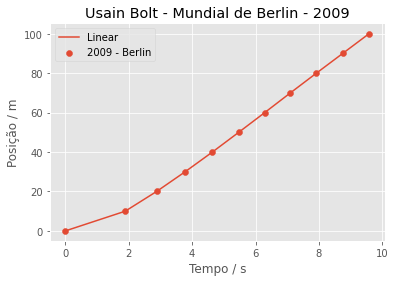

In [26]:
plt.xlabel('Tempo / s')
plt.ylabel('Posição / m')
plt.title('Usain Bolt - Mundial de Berlin - 2009')

plt.scatter(dados['2009_Berlin'], marcas, label='2009 - Berlin')
plt.plot(tempo, linear_2009_berlin(tempo), label='Linear')
plt.legend()
plt.show()

É o mesmo gráfico gerado pelo método `plot`.

Tudo bem, mostramos que foi feito realmente uma interpolação linear entre cada par de pontos. Mas o que devemos fazer então?

Aqui cabe destacar que há várias formas de abordagem quando se trata de interpolação. Uma forma de abordagem é procurar um [polinômio](https://en.wikipedia.org/wiki/Polynomial_interpolation) que passe por todos os pontos. Dados *n* pontos, há um polinômio de grau *n-1* que interpola tais pontos. Essa abordagem é computacionalmente cara e pode exibir alguns artefatos oscilatórios nos pontos extremos, o que é conhecido como [fenômeno de Runge](https://en.wikipedia.org/wiki/Runge%27s_phenomenon).

[Essa animação interativa](https://www.geogebra.org/m/ddxsk6k8) ilustra bem tal fenômeno para aqueles que tiveram dificuldade de visualizar o escrito acima.

Uma outra abordagem é fazer um interpolação por partes (também chamada de interpolação por polinômios seccionados), ou seja, ao invés de buscar uma função única que passe por todos os pontos, divide-se os pontos em intervalos. Cada intervalo é interpolado e anexado ao intervalo seguinte de manera a obter uma curva contínua.

## Splines

Dentre as formas de interpolação por partes, destaca-se a chamada de [spline](https://en.wikipedia.org/wiki/Spline_interpolation). A vantagem é que boas interpolações são conseguidas com polinômios de baixa ordem, evitando o fenômeno de Runge.

Um bom ponto de partida é começar com splines cúbicos, ou seja, utilizando polinômios de grau 3 em cada intervalo. É um grau baixo e garante continuidade da função até sua derivada de segunda ordem, algo que será importante para gente mais adiante. Cabe destacar que é um ponto de partida comum quando se tem pouco conhecimento do comportamento dos dados, mas não é uma bala de prata, sempre busque conhecer ao máximo o contexto de seus dados.

Mesmo dentre os splines cúbicos há [diferentes tipos](https://en.wikipedia.org/wiki/Natural_cubic_spline), a depender das condições de contorno, mas que não entrarei no mérito aqui nesse artigo. Vamos utilizar um método específico do SciPy para spline cúbicos o [CubicSpline](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html). Como é possível ver na documentação linkada, há como alterar o tipo (condições de contorno), mas irei manter o padrão aqui nesse artigo.

In [27]:
from scipy.interpolate import CubicSpline

Vamos então obter os splines para nossos dados:

In [28]:
cs_2009_berlin = CubicSpline(dados['2009_Berlin'], marcas)
cs_2008_beijing = CubicSpline(dados['2008_Beijing'], marcas)

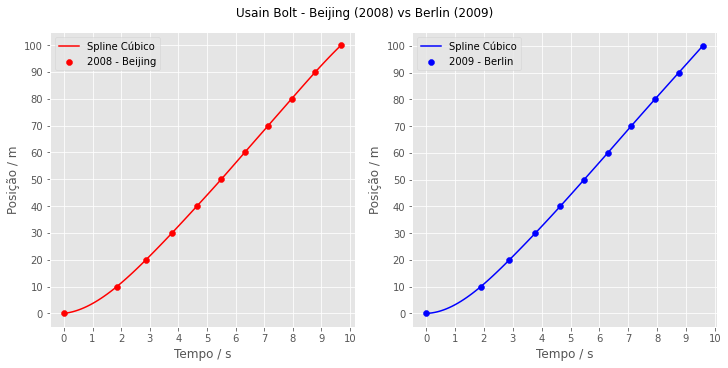

In [29]:
fig3, axarr = plt.subplots(nrows=1, ncols=2, figsize=(10,5), constrained_layout=True, facecolor=(1,1,1))

ax1 = axarr[0]
ax2 = axarr[1]

ticks_posicao = plticker.MultipleLocator(base=10)
ticks_tempo = plticker.MultipleLocator(base=1)

ax1.scatter(dados['2008_Beijing'], marcas, label='2008 - Beijing', color='red')
ax1.plot(tempo, cs_2008_beijing(tempo), label='Spline Cúbico', color='red')
ax2.scatter(dados['2009_Berlin'], marcas, label='2009 - Berlin', color='blue')
ax2.plot(tempo, cs_2009_berlin(tempo), label='Spline Cúbico', color='blue')

# nomeando os eixos e colocando as marcações no intervalo desejado
for ax in axarr:
    ax.set_xlabel('Tempo / s')
    ax.xaxis.set_major_locator(ticks_tempo)
    ax.set_ylabel('Posição / m')
    ax.yaxis.set_major_locator(ticks_posicao)
    ax.legend()

# título principal
fig3.suptitle('Usain Bolt - Beijing (2008) vs Berlin (2009)')
plt.show()

Finalmente, parece que agora temos um gráfico que nos permite continuar nossas explorações

# Obtendo a velocidade e a aceleração de Bolt

## Velocidade média

Agora que temos o que parece um modelo mais aceitável de como varia a posição de Bolt no tempo podemos calcular sua velocidade. Mas precisamos esclarecer que tipo de velocidade estamos querendo determinar. Afinal, se for apenas a velocidade média, isso já poderia ter sido calculado posto que sabemos o total de deslocamento, 100 metros, e o tempo que durou o deslocamento, o tempo final da prova, que é a última posição de cada array de tempos:

In [30]:
velocidade_media_beijing = 100 / dados['2008_Beijing'][-1]
print(f'Velocidade média em Beijing (2008): {velocidade_media_beijing:.2f} m/s')

velocidade_media_berlin = 100 / dados['2009_Berlin'][-1]
print(f'Velocidade média em Berlin (2009): {velocidade_media_berlin:.2f} m/s')

Velocidade média em Beijing (2008): 10.32 m/s
Velocidade média em Berlin (2009): 10.44 m/s


Já escrevi [aqui sobre o pacote pint](https://cienciaprogramada.com.br/2020/09/python-unidades-cerveja-pint/) que permite lidar com unidades e fazer conversões. Vamos usar esse pacote para converter os valores para quilômetros por hora, unidade que estamos mais acostumados:

In [31]:
import pint

ureg = pint.UnitRegistry(fmt_locale='pt_BR')
Q_ = ureg.Quantity

velocidade_media_beijing = Q_(velocidade_media_beijing, 'm/s')
velocidade_media_berlin = Q_(velocidade_media_berlin, 'm/s')

In [32]:
print(f"Velocidade média em Beijing (2008): {velocidade_media_beijing.to('km/hour'):.2f}")
print(f"Velocidade média em Berlin (2009): {velocidade_media_berlin.to('km/hour'):.2f}")

Velocidade média em Beijing (2008): 37.15 quilômetros por horas
Velocidade média em Berlin (2009): 37.58 quilômetros por horas


Impressionante, não?

## Velocidade instantânea

Mas o que seria mais interessante é estimar a velocidade em cada momento da prova, a chamada velocidade instantânea. Afinal, como já discutimos, a velocidade de Bolt durante as provas não é constante. Para obter tais médias, certamente em alguns momentos Bolt correu *acima* desses valores. Como podemos obter velocidades instantâneas?

Utilizaremos um pouco de cálculo aqui e o fato de que agora temos uma curva unindo os pontos experimentais. Para a velocidade média, pegamos dois pontos distantes, o início e o fim da prova. Agora, imagine pegar pontos cada vez mais próximos, ou seja, diminuindo cada vez mais o intervalo de tempo entre os pontos. No limite em que esse intervalo tender a zero, teremos a velocidade instantânea.

Fica mais fácil visualizar com uma imagem. Observe a animação abaixo. Nela temos uma curva de uma função qualquer, a marcação de dois pontos, **A** e **B**, e a visualização do triângulo formado para obter a variação da quantidade do eixo *y* e a do eixo *x* com auxílio de um terceiro ponto **C**. No caso de nossos gráficos, variação da distância e do tempo, respectivamente. Na animação, os pontos vão se aproximando cada vez mais. Observe que, no limite em que os pontos se tornam mais próximos, a hipotenusa do triângulo, inicialmente uma [reta secante](https://en.wikipedia.org/wiki/Secant_line) da curva, torna-se uma reta tangente no ponto de virtual encontro **A**. A reta azul é a tangente no ponto **A**, apresentada justamente para mostrar como a secante se aproxima cada vez mais de uma tangente.

![animacao_tangente](animacao_tangente.gif)

Assim, matematicamente, a velocidade instantânea em um dado momento é a inclinação da reta tangente à curva do gráfico posição vs tempo no momento desejado. Em [cálculo](https://en.wikipedia.org/wiki/Calculus), isso é o mesmo que dizer que a velocidade instantânea é a [derivada](https://en.wikipedia.org/wiki/Derivative) da posição com relação ao tempo em um dado dado ponto do gráfico.

Eu havia citado anteriormente que o fato dos splines cúbicos garantirem que a curva obtida possui derivadas primeira e segunda era importante. Agora sabemos o porquê.

O bom do `CubicSpline` do SciPy é que é muito simples solicitar a primeira derivada, bastando passar o parâmetro `1` para o spline obtido. Veja o código abaixo:

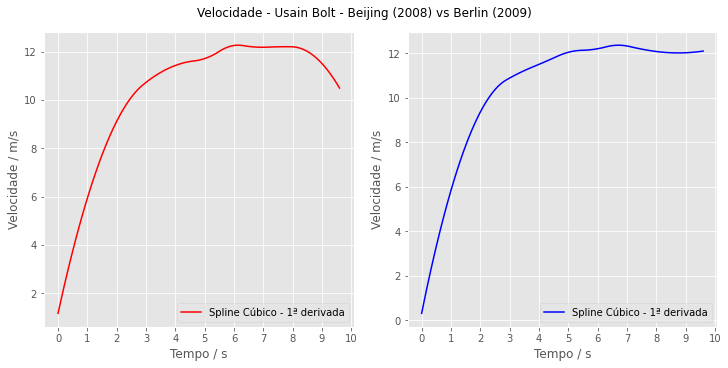

In [33]:
fig4, axarr = plt.subplots(nrows=1, ncols=2, figsize=(10,5), constrained_layout=True, facecolor=(1,1,1))

ax1 = axarr[0]
ax2 = axarr[1]

ticks_velocidade = plticker.MultipleLocator(base=2)
ticks_tempo = plticker.MultipleLocator(base=1)

ax1.plot(tempo, cs_2008_beijing(tempo, 1), label='Spline Cúbico - 1ª derivada', color='red')
ax2.plot(tempo, cs_2009_berlin(tempo, 1), label='Spline Cúbico - 1ª derivada', color='blue')

for ax in axarr:
    ax.set_xlabel('Tempo / s')
    ax.xaxis.set_major_locator(ticks_tempo)
    ax.set_ylabel('Velocidade / m/s')
    ax.yaxis.set_major_locator(ticks_velocidade)
    ax.legend()

fig4.suptitle('Velocidade - Usain Bolt - Beijing (2008) vs Berlin (2009)')
plt.show()

Perceba que obtivemos perfis condizentes com o que esperávamos. Na prova de 2008, a velocidade cai próximo ao segundo final de prova, quando Bolt já visivelmente comemorava. Na de 2009, o jamaicano é mais consistente na velocidade.

Podemos verificar as velocidades máximas que nosso modelo fornece para cada caso:

In [34]:
velocidade_max_2008_cs = Q_(max(cs_2008_beijing(tempo, 1)), 'm/s')
velocidade_max_2009_cs = Q_(max(cs_2009_berlin(tempo, 1)), 'm/s')

print(f'{velocidade_max_2008_cs:.2f}')
print(f'{velocidade_max_2009_cs:.2f}')

12.26 metros por segundos
12.37 metros por segundos


Em quilômetros por hora:

In [35]:
print(f"{velocidade_max_2008_cs.to('km/hour'):.2f}")
print(f"{velocidade_max_2009_cs.to('km/hour'):.2f}")

44.14 quilômetros por horas
44.53 quilômetros por horas


Já dá para multá-lo em perimêtros urbanos. Anotaram a placa?

Seguindo a lógica de tudo que mostramos até agora, podemos obter uma curva para aceleração. A aceleração é a variação da velocidade no tempo, o que é o mesmo que dizer que a aceleração é a derivada primeira da velocidade em relação ao tempo. Ou, a derivada segunda da posição em relação ao tempo. Daí:

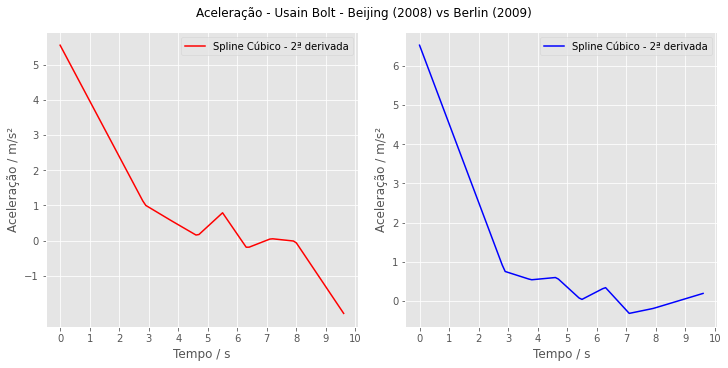

In [36]:
fig5, axarr = plt.subplots(nrows=1, ncols=2, figsize=(10,5), constrained_layout=True, facecolor=(1,1,1))

ax1 = axarr[0]
ax2 = axarr[1]

ticks_velocidade = plticker.MultipleLocator(base=1)
ticks_tempo = plticker.MultipleLocator(base=1)

ax1.plot(tempo, cs_2008_beijing(tempo, 2), label='Spline Cúbico - 2ª derivada', color='red')
ax2.plot(tempo, cs_2009_berlin(tempo, 2), label='Spline Cúbico - 2ª derivada', color='blue')

for ax in axarr:
    ax.set_xlabel('Tempo / s')
    ax.xaxis.set_major_locator(ticks_tempo)
    ax.set_ylabel('Aceleração / m/s²')
    ax.yaxis.set_major_locator(ticks_velocidade)
    ax.legend()

fig5.suptitle('Aceleração - Usain Bolt - Beijing (2008) vs Berlin (2009)')
plt.show()

Os gráficos também estão relativamente bem coerentes, uma grande aceleração inicial e depois mantendo uma aceleração positiva buscando aumentar a velocidade. Em 2008, uma aceleração negativa bem próximo ao final, indicando desaceleração perto da linha de chegada.

Embora estejam coerentes, precisamos ter cuidado com nossos modelos. Nos gráficos de aceleração observamos alterações bruscas nos perfis. Isso é um pouco estranho, lembre-se que é um humano, não há um pedal de acelerador ou freio! Talvez fosse de se esperar variações menos bruscas.

# Melhorando nosso modelo

Obviamente que diversas pessoas e empresas fazem estudos sobre o desempenho dos atletas. Inclusive há todo um ramo de estudos chamado [biomecânica esportiva](https://en.wikipedia.org/wiki/Sports_biomechanics) voltado para isso. Analisando estudos da área, vemos que usualmente se utilizam splines, mas só que de grau 5 e não 3. Em inglês, o termo é *quintic splines*, sendo *quintic* relativo ao grau 5. Não por outro motivo que há uma [empresa chamada Quintic](https://www.quinticsports.com/about/) que justamente trabalha com softwares de biomecânica esportiva. Alguns livros de biomecânica, [como esse](https://www.amazon.com/Introduction-Sports-Biomechanics-Analysing-Movement-ebook-dp-B001ROAJR2/dp/B001ROAJR2/ref=mt_other?_encoding=UTF8&me=&qid=), possuem trechos dedicados ao estudo de splines de grau 5 dada a importância na área.

Logo, podemos verificar como ficaria uma interpolação com splines de quinto grau. O SciPy possui o `UnivariateSpline` onde podemos passar um parâmetro para indicar o grau do spline desejado:

In [37]:
from scipy.interpolate import UnivariateSpline

In [38]:
s_grau5_2008_beijing = UnivariateSpline(dados['2008_Beijing'], marcas, k=5)
s_grau5_2009_berlin = UnivariateSpline(dados['2009_Berlin'], marcas, k=5)

Vamos fazer os gráficos de posição, velocidade e aceleração *versus* tempo:

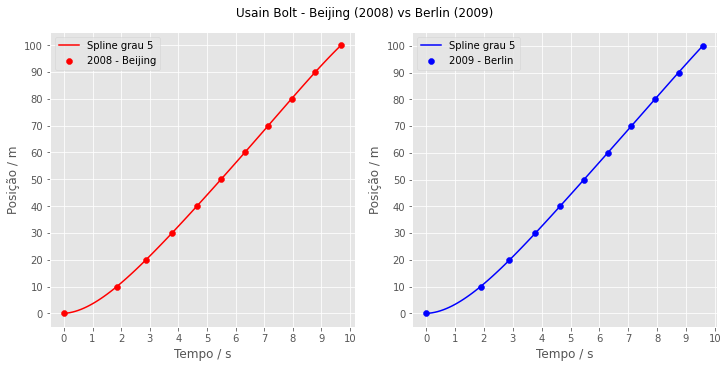

In [39]:
fig6, axarr = plt.subplots(nrows=1, ncols=2, figsize=(10,5), constrained_layout=True, facecolor=(1,1,1))

ax1 = axarr[0]
ax2 = axarr[1]

ticks_posicao = plticker.MultipleLocator(base=10)
ticks_tempo = plticker.MultipleLocator(base=1)

ax1.scatter(dados['2008_Beijing'], marcas, label='2008 - Beijing', color='red')
ax1.plot(tempo, s_grau5_2008_beijing(tempo), label='Spline grau 5', color='red')
ax2.scatter(dados['2009_Berlin'], marcas, label='2009 - Berlin', color='blue')
ax2.plot(tempo, s_grau5_2009_berlin(tempo), label='Spline grau 5', color='blue')

# nomeando os eixos e colocando as marcações no intervalo desejado
for ax in axarr:
    ax.set_xlabel('Tempo / s')
    ax.xaxis.set_major_locator(ticks_tempo)
    ax.set_ylabel('Posição / m')
    ax.yaxis.set_major_locator(ticks_posicao)
    ax.legend()

# título principal
fig6.suptitle('Usain Bolt - Beijing (2008) vs Berlin (2009)')
plt.show()

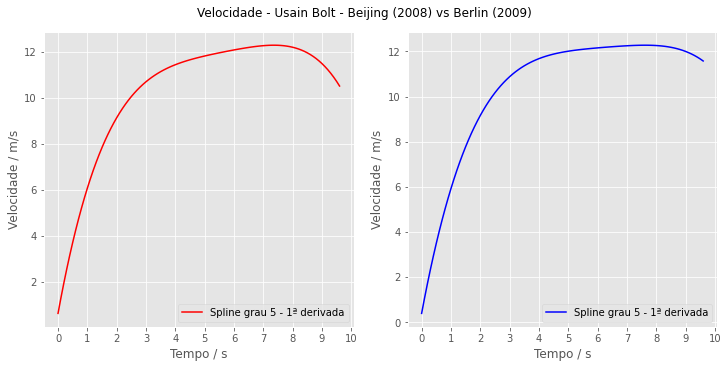

In [40]:
fig7, axarr = plt.subplots(nrows=1, ncols=2, figsize=(10,5), constrained_layout=True, facecolor=(1,1,1))

ax1 = axarr[0]
ax2 = axarr[1]

ticks_velocidade = plticker.MultipleLocator(base=2)
ticks_tempo = plticker.MultipleLocator(base=1)

ax1.plot(tempo, s_grau5_2008_beijing(tempo, 1), label='Spline grau 5 - 1ª derivada', color='red')
ax2.plot(tempo, s_grau5_2009_berlin(tempo, 1), label='Spline grau 5 - 1ª derivada', color='blue')

for ax in axarr:
    ax.set_xlabel('Tempo / s')
    ax.xaxis.set_major_locator(ticks_tempo)
    ax.set_ylabel('Velocidade / m/s')
    ax.yaxis.set_major_locator(ticks_velocidade)
    ax.legend()

fig7.suptitle('Velocidade - Usain Bolt - Beijing (2008) vs Berlin (2009)')
plt.show()

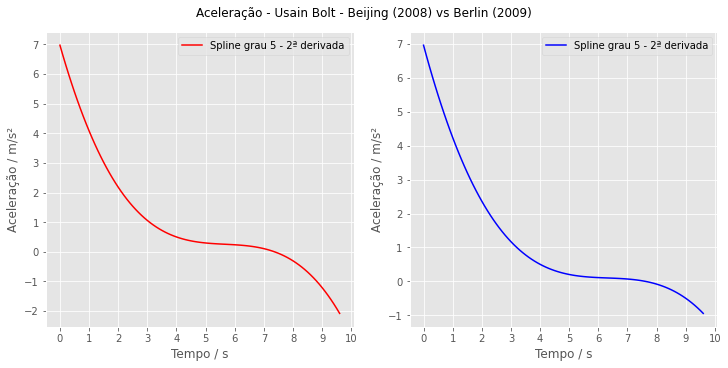

In [41]:
fig8, axarr = plt.subplots(nrows=1, ncols=2, figsize=(10,5), constrained_layout=True, facecolor=(1,1,1))

ax1 = axarr[0]
ax2 = axarr[1]

ticks_velocidade = plticker.MultipleLocator(base=1)
ticks_tempo = plticker.MultipleLocator(base=1)

ax1.plot(tempo, s_grau5_2008_beijing(tempo, 2), label='Spline grau 5 - 2ª derivada', color='red')
ax2.plot(tempo, s_grau5_2009_berlin(tempo, 2), label='Spline grau 5 - 2ª derivada', color='blue')

for ax in axarr:
    ax.set_xlabel('Tempo / s')
    ax.xaxis.set_major_locator(ticks_tempo)
    ax.set_ylabel('Aceleração / m/s²')
    ax.yaxis.set_major_locator(ticks_velocidade)
    ax.legend()

fig8.suptitle('Aceleração - Usain Bolt - Beijing (2008) vs Berlin (2009)')
plt.show()

Repare que agora as curvas de aceleração são mais suaves. Mais coerente com uma variação gradual do atleta. Inclusive, contrariamente ao spline cúbico anterior, o gráfico de 2009 agora mostra uma leve desaceleração ao final.

Vamos ver como a mudança de interpolação mudou a estimativa de velocidade máxima:

In [42]:
velocidade_max_2008_s5grau = Q_(max(s_grau5_2008_beijing(tempo, 1)), 'm/s')
velocidade_max_2009_s5grau = Q_(max(s_grau5_2009_berlin(tempo, 1)), 'm/s')

print(f'{velocidade_max_2008_s5grau:.2f}')
print(f'{velocidade_max_2009_s5grau:.2f}')

12.28 metros por segundos
12.27 metros por segundos


Como as curvas foram "suavizadas", não mais tantos máximos e mínimos no gráfico. Será mesmo que Bolt atingiu uma menor velocidade máxima em 2009 quando comparado a 2008?

# Será que nossos modelos estão certos?

Não. Modelos tentam descrever a realidade, não são a realidade. Não faz muito sentido dizer "certo" ou "errado", podemos avaliar com base nos dados que temos se estão coerentes, se fazem predições que tenham sentido. Ou seja, as discussões que estamos fazendo a cada etapa aqui nesse artigo. Eles podem ser, no máximo, tão bons quanto os dados de entrada o famoso [GIGO - *garbage in, garbage out*](https://en.wikipedia.org/wiki/Garbage_in,_garbage_out), em português menos agressivo, dados de entradas ruins, saídas ruins. Como só temos dados de posição a cada 10 metros, tudo que vier dessa análise será limitado por esses dados de entrada. 

No caso da velocidade máxima, por exemplo, se ela foi atingida em algum ponto intermediário, obviamente que a forma de interpolação para obter esses pontos terá grande efeito no resultado.

## Obtendo dados experimentais de velocidade

O desempenho de Bolt nas Olimpíadas de 2008, quando quebrou o recorde mundial dos 100 m pela primeira vez, chamou tanta a atenção que mudou a forma de preparo da comunidade científica para o Mundial de 2009. Muitos [pensavam qual seria o tempo](https://aapt.scitation.org/doi/pdf/10.1119/1.3033168) se ele não tivesse desacelerado para comemorar nos metros finais e havia muito interesse em entender o desempenho do jamaicano.

Assim, foram utilizadas câmeras especiais, medidores de velocidade e muitos outros equipamentos para estudar a biomecânica dos atletas da competição. O [artigo gerado](http://www.meathathletics.ie/devathletes/pdf/Biomechanics%20of%20Sprints.pdf) vale muito a leitura. Os detalhes são sensacionais.

Um ponto interessante do artigo é que, com os medidores de velocidade utilizados, puderam estimar as velocidades médias dos atletas a cada 10 metros. Vamos importar esses dados e comparar com nossos modelos:

In [43]:
!cat bolt_berlin_vel.csv

Splits,"2009 Berlin"
0,0
"0 - 10",5.77
"10 - 20",9.99
"20 - 30",11.11
"30 - 40",11.63
"40 - 50",12.08
"50 - 60",12.20
"60 - 70",12.29
"70 - 80",12.17
"80 - 90",12.17
"90 - 100",11.96


In [44]:
arquivo_berlin_velocidade = 'bolt_berlin_vel.csv'

In [45]:
dados_berlin_velocidade = np.genfromtxt(arquivo_berlin_velocidade, delimiter=',', dtype=['U10', float], names=True)

In [46]:
dados_berlin_velocidade

array([('0',  0.  ), ('"0 - 10"',  5.77), ('"10 - 20"',  9.99),
       ('"20 - 30"', 11.11), ('"30 - 40"', 11.63), ('"40 - 50"', 12.08),
       ('"50 - 60"', 12.2 ), ('"60 - 70"', 12.29), ('"70 - 80"', 12.17),
       ('"80 - 90"', 12.17), ('"90 - 100"', 11.96)],
      dtype=[('Splits', '<U10'), ('2009_Berlin', '<f8')])

A velocidade máxima obtida foi de:

In [47]:
Q_(max(dados_berlin_velocidade['2009_Berlin']), 'm/s')

12.29 <Unit('meter / second')>

Mas lembre-se, essa velocidade é resultado de uma média feita a cada 10 metros. Já vou explicar mais sobre isso adiante. A real velocidade máxima de Bolt na prova, de acordo com o artigo citado, foi de 12,34 m/s quando já havia percorrido 67,90 m.

Vamos comparar esses dados com nosso modelo feito com spline cúbico:

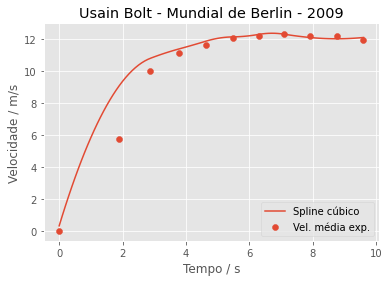

In [48]:
plt.xlabel('Tempo / s')
plt.ylabel('Velocidade / m/s')
plt.title('Usain Bolt - Mundial de Berlin - 2009')

plt.scatter(dados['2009_Berlin'], dados_berlin_velocidade['2009_Berlin'], label='Vel. média experimental')
plt.plot(tempo, cs_2009_berlin(tempo, 1), label='Spline cúbico')
plt.legend()
plt.show()

E agora com o spline de quinto grau:

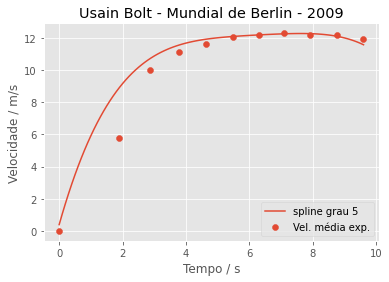

In [49]:
plt.xlabel('Tempo / s')
plt.ylabel('Velocidade / m/s')
plt.title('Usain Bolt - Mundial de Berlin - 2009')

plt.scatter(dados['2009_Berlin'], dados_berlin_velocidade['2009_Berlin'], label='Vel. média experimental')
plt.plot(tempo, s_grau5_2009_berlin(tempo, 1), label='spline grau 5')
plt.legend()
plt.show()

E aí? Alguma conclusão? Difícil dizer. Ambos falham nos tempos iniciais. O modelo de quinto grau apresenta melhor a queda de velocidade no trecho final. Mas devemos ficar atentos se a comparação faz sentido.

O modelo de interpolação gera pontos intermediários nos dados de posição, cria o spline de posição, que é então derivado para obter a curva de velocidade. A velocidade tabelada no artigo é, como já dito, uma média a cada intervalo de 10 metros feita com base nas medições de velocidade. Vamos ver um dos gráficos do artigo para entender:

![artigo2009](artigo_2009.png)

Infelizmente a resolução da figura disponível não é das melhores. Mas temos a velocidade no eixo vertical e a posição no horizontal. A linha azul é resultado dos dados experimentais dos medidores e, a vermelha, uma linha média desses dados.

Consegue entender por que utilizaram uma média? A velocidade oscila muito, afinal, ao correr ocorre o impacto rítmico de cada pé, em cada passada. Inclusive o próprio artigo e outras referências [como esta](http://www.johk.pl/files/15mackala.pdf) e [essa](https://hrcak.srce.hr/ojs/index.php/kinesiology/article/view/5579#:~:text=THE%20KINEMATICS%20OF%20USAIN%20BOLT'S%20MAXIMAL%20SPRINT%20VELOCITY,-Milan%20%C4%8Coh%20University&text=Despite%20a%20relatively%20slow%20reaction,and%204.36%20strides%2Fs%20frequency) mostram que o grande diferencial do Bolt é na sua passada. A leitura dos artigos também deixa clara as dificuldades experimentais de medir velocidade, afinal se trata de corpos e não de pontos, precisando se determinar a posição do corpo que vai ser monitorada, a influência do tempo de reação do atleta nos resultados, especialmente nos primeiros metros, dentre outros fatores.

## O que poderia ser melhorado?

Espero que você tenha entendido que há muitos fatores envolvidos e que isso aqui é apenas um exercício para demonstrar a linguagem Python, ferramentas matemáticas disponíveis e um pouco de cálculo e física. Mas vamos terminar o artigo pensando em como poderíamos melhorar nossa análise. 

Analise novamente os gráficos de velocidade obtidos. Há algo estranho? Bom, não sei se reparou, mas os gráficos não começam em zero. Isso pode ser resolvido forçando uma condição de contorno onde a primeira derivada deve ter valor zero no ponto inicial. Isso é possível de ser feito e já havia citado que há diferentes tipos de spline a depender das condições de contorno. Uma leitura na documentação dos métodos de spline mostra como isso poderia ser feito. Escreva na seção de comentários caso queira um artigo onde isso é feito ou caso você tenha feito e queira mostrar.

Mas não é tão simples assim, afinal há o tempo de reação do atleta. A velocidade é nula até que o atleta comece a se movimentar. Cabe a você considerar se isso irá afetar muito a análise ou não. E como seria implementar isso. Ah, vai tentar descontar a influência do vento ou não?

Outra abordagem é partir de modelos matemáticos previamente definidos na literatura. Recomendo a leitura [deste artigo](https://jeb.biologists.org/content/jexbio/208/14/2809.full.pdf) e também [desse aqui](https://staff.fnwi.uva.nl/a.j.p.heck/Research/art/ModelingSprinting.pdf). Assim, as condições de contorno poderiam ser as equações propostas nesses artigos e caberia verificar se representam bem as situações ou não.

Por fim, lembra mais acima que escrevi sobre o método de interpolação polinomial? Quando se busca um polinômio que passa por todos os pontos? Outras pessoas já fizeram estudos nesse sentido: como [aqui](https://web.archive.org/web/20141006173930/http://rcuksportscience.wikispaces.com/file/view/Analysing+men+100m+Nspire.pdf) e [aqui](https://education.ti.com/sites/UK/downloads/pdf/TI-Nspire_STEM_MathsMotion.pdf). Veja os resultados e compare com a abordagem que utilizamos. Busque também reproduzir os estudos e tire suas conclusões.

# Conclusão

Ufa, não foi fácil fazer esse artigo. Muita leitura, matemática, esporte, física e Python. Mas o objetivo era mostrar ferramentas matemáticas disponíveis para a linguagem utilizando um problema real. Acredito ser muito mais produtivo que mostrar exemplos batidos que todo livro e site tem. 

E usar um problema real permite também discutir as limitações de métodos e modelos e como analisá-los criticamente. Infelizmente, enxergo que há alguns problemas na forma que são ensinados e utilizados hoje. A saber:

- muitos confundem modelo com realidade;
- há aplicação de ferramentas em contextos onde não se aplicam;
- relacionado ao item anterior, há muitos usuários de métodos e modelos, mas poucos analistas e entendedores dos mesmos;
- são pouco utilizados casos reais no ensino, de forma que não se exercita análise crítica. Dados de livros são sempre bonitinhos, né?
- a divulgação/interpretação da mídia de estudos científicos e dos resultados de modelos é lastimável.

A consequência disso tudo se relaciona ao que vivemos nesse ano de 2020, quando escrevo esse artigo. Afinal, boa parte do que vivemos esse ano foi consequência de predições feitas a partir de modelos lá no início do ano. [Lembra](https://g1.globo.com/bemestar/coronavirus/noticia/2020/03/27/sem-isolamento-e-acoes-contra-a-covid-19-brasil-pode-ter-ate-1-milhao-de-mortes-na-pandemia-diz-estudo.ghtml)? Obviamente que a doença é séria e não deve ser negligenciada, não é esse o ponto. Mas será que todos os cuidados foram tomados no modelo e no software do mesmo? [Parece que não](https://www.akitaonrails.com/2020/05/07/o-modelo-do-imperial-college-sobre-a-covid-19-pode-estar-errado). Será que pensaram nas consequências políticas e na vida e liberdade das pessoas? As previsões se confirmaram? Fica a reflexão.

Caso queira receber notificação quando novos artigos e vídeos sobre ciência e programação forem lançados, nos acompanhe nas redes sociais linkadas no cabeçalho e no rodapé da página. Comente o que achou abaixo e compartilhe com mais gente interessada em ciência.

Até a próxima.